# Travel Review Ratings Dataset

Este conjunto de datos se ha elaborado recopilando las valoraciones de los usuarios en las reseñas de Google. Se consideran reseñas de atracciones pertenecientes a 24 categorías en toda Europa. La calificación de los usuarios en Google varía de 1 a 5, y se calcula la calificación media por categoría.

## 1. Importar Librerías y Dataset

In [1]:
!pip install ucimlrepo

In [2]:
# Importar Dataset
from ucimlrepo import fetch_ucirepo

# Guardar modelos
import joblib

#Tratamiento y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos y entrenamiento
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, make_scorer, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import pair_confusion_matrix, contingency_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import randint

#Dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [3]:
# fetch dataset
travel_review_ratings = fetch_ucirepo(id=485)

# data (as pandas dataframes)
X = travel_review_ratings.data.features
y = travel_review_ratings.data['ids'] # Users

## 2. Exploración

In [4]:
# Concatenar X e Y para exploración
df = pd.concat([X, y], axis=1)

In [5]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoos                   5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15  danc

In [7]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,userid
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,User 1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,User 2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,User 3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,User 4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,User 5


In [8]:
print(df.isna().sum())

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
userid                   0
dtype: int64


## 3. Limpieza

Como también existen valores NaN y estos no representan una gran cantidad de datos, podemos eliminar las filas que los contienen.

In [9]:
df = df.dropna()

traducimos las categorías al español para poder utilizarlas con el chatbot

In [10]:
# Diccionario de traducción de columnas
column_translation = {
    'churches': 'iglesias',
    'resorts': 'resorts',
    'beaches': 'playas',
    'parks': 'parques',
    'theatres': 'teatros',
    'museums': 'museos',
    'malls': 'centros comerciales',
    'zoos': 'zoológicos',
    'restaurants': 'restaurantes',
    'pubs/bars': 'pubs/bares',
    'local services': 'servicios locales',
    'burger/pizza shops': 'hamburgueserías/pizzerías',
    'hotels/other lodgings': 'hoteles/otros alojamientos',
    'juice bars': 'bares de jugos',
    'art galleries': 'galerías de arte',
    'dance clubs': 'discotecas',
    'swimming pools': 'piscinas',
    'gyms': 'gimnasios',
    'bakeries': 'pastelerías',
    'beauty & spas': 'belleza y spas',
    'cafes': 'cafeterías',
    'view points': 'miradores',
    'monuments': 'monumentos',
    'gardens': 'jardines',
    'userid': 'userid'
}

# Renombramos las columnas
df.rename(columns=column_translation, inplace=True)

# Verificamos si se realizó correctamente
print(df.columns)


Index(['iglesias', 'resorts', 'playas', 'parques', 'teatros', 'museos',
       'centros comerciales', 'zoológicos', 'restaurantes', 'pubs/bares',
       'servicios locales', 'hamburgueserías/pizzerías',
       'hoteles/otros alojamientos', 'bares de jugos', 'galerías de arte',
       'discotecas', 'piscinas', 'gimnasios', 'pastelerías', 'belleza y spas',
       'cafeterías', 'miradores', 'monumentos', 'jardines', 'userid'],
      dtype='object')


Como nos vamos a centrar solo en activiades, eliminamos aquellas categorías que no guarden relación con una actividad o sean lugares que no aplican bien a Chile

In [11]:
# Eliminar columnas
df = df.drop(['servicios locales', 'hoteles/otros alojamientos', 'bares de jugos'], axis=1)

## 4. Escalar y dividir los datos

Para evitar sobreajuste y garantizar una evaluación honesta del modelo de clasificación, se dividió el conjunto de datos en dos etapas. Primero, se destinó el 60% de los datos exclusivamente para realizar el clustering no supervisado mediante UMAP y KMeans, con el objetivo de descubrir estructuras latentes en las preferencias de los usuarios sin influencias del modelo de clasificación. Luego, el 40% restante se reservó para entrenar y evaluar un clasificador supervisado (Random Forest) encargado de predecir a qué cluster pertenece un nuevo usuario, usando solo sus características originales.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('userid', axis=1))

In [13]:
# Dividir primero: clustering (60%), luego split de clasificación (20% + 20%)
X_cluster, X_clf, idx_cluster, idx_clf = train_test_split(
    X_scaled, np.arange(len(X_scaled)), test_size=0.4, random_state=42)

X_clf_train, X_clf_test, idx_clf_train, idx_clf_test = train_test_split(
    X_clf, idx_clf, test_size=0.5, random_state=42)

## 5. UMAP + Kmeans
Se utilizó la combinación de UMAP (Uniform Manifold Approximation and Projection) y KMeans como técnica de agrupamiento no supervisado para identificar perfiles latentes de usuarios. UMAP fue elegido como método de reducción de dimensionalidad debido a su capacidad para preservar tanto la estructura global como local del espacio original, lo que permite representar datos complejos en un espacio de menor dimensión de forma más fiel que técnicas lineales como PCA. Al proyectar los datos escalados a un espacio reducido, se facilita la tarea del algoritmo KMeans, el cual asume separaciones euclidianas entre clusters. Esta combinación permite mejorar la separación de los grupos y optimizar métricas de cohesión como Silhouette Score

In [14]:
best_score = -1
best_k = None
best_dim = None

Ks = np.arange(2, 10)
dims = [2, 3, 5, 10, 20, 50]

for dim in dims:
    reducer = umap.UMAP(n_components=dim, random_state=42)
    X_cluster_umap = reducer.fit_transform(X_cluster)

    for k in Ks:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_cluster_umap)
        labels = kmeans.labels_
        score = silhouette_score(X_cluster_umap, labels)

        print(f"Dim: {dim}, k: {k}, Silhouette: {score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
            best_dim = dim
            best_reducer = reducer
            best_kmeans = kmeans

print(f"\nMejor combinación → Dim: {best_dim}, k: {best_k}, Silhouette: {best_score:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 2, k: 2, Silhouette: 0.4758
Dim: 2, k: 3, Silhouette: 0.4395
Dim: 2, k: 4, Silhouette: 0.4738
Dim: 2, k: 5, Silhouette: 0.4429
Dim: 2, k: 6, Silhouette: 0.4787
Dim: 2, k: 7, Silhouette: 0.4711
Dim: 2, k: 8, Silhouette: 0.5099
Dim: 2, k: 9, Silhouette: 0.4903


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 3, k: 2, Silhouette: 0.4681
Dim: 3, k: 3, Silhouette: 0.4074
Dim: 3, k: 4, Silhouette: 0.4007
Dim: 3, k: 5, Silhouette: 0.4221
Dim: 3, k: 6, Silhouette: 0.3955
Dim: 3, k: 7, Silhouette: 0.4587
Dim: 3, k: 8, Silhouette: 0.4453
Dim: 3, k: 9, Silhouette: 0.4149


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 5, k: 2, Silhouette: 0.4305
Dim: 5, k: 3, Silhouette: 0.3985
Dim: 5, k: 4, Silhouette: 0.4102
Dim: 5, k: 5, Silhouette: 0.4026
Dim: 5, k: 6, Silhouette: 0.4248
Dim: 5, k: 7, Silhouette: 0.4280
Dim: 5, k: 8, Silhouette: 0.4346
Dim: 5, k: 9, Silhouette: 0.4312


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 10, k: 2, Silhouette: 0.4067
Dim: 10, k: 3, Silhouette: 0.3528
Dim: 10, k: 4, Silhouette: 0.3351
Dim: 10, k: 5, Silhouette: 0.3743
Dim: 10, k: 6, Silhouette: 0.3890
Dim: 10, k: 7, Silhouette: 0.4266
Dim: 10, k: 8, Silhouette: 0.4428
Dim: 10, k: 9, Silhouette: 0.4330


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 20, k: 2, Silhouette: 0.4295
Dim: 20, k: 3, Silhouette: 0.3716
Dim: 20, k: 4, Silhouette: 0.3632
Dim: 20, k: 5, Silhouette: 0.3455
Dim: 20, k: 6, Silhouette: 0.3752
Dim: 20, k: 7, Silhouette: 0.4151
Dim: 20, k: 8, Silhouette: 0.4193
Dim: 20, k: 9, Silhouette: 0.4463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dim: 50, k: 2, Silhouette: 0.4136
Dim: 50, k: 3, Silhouette: 0.3597
Dim: 50, k: 4, Silhouette: 0.3696
Dim: 50, k: 5, Silhouette: 0.4034
Dim: 50, k: 6, Silhouette: 0.3723
Dim: 50, k: 7, Silhouette: 0.3344
Dim: 50, k: 8, Silhouette: 0.3977
Dim: 50, k: 9, Silhouette: 0.3912

Mejor combinación → Dim: 2, k: 8, Silhouette: 0.5099


In [15]:
X_clf_train_umap = best_reducer.transform(X_clf_train)
X_clf_test_umap = best_reducer.transform(X_clf_test)

y_clf_train = best_kmeans.predict(X_clf_train_umap)
y_clf_test = best_kmeans.predict(X_clf_test_umap)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 6. Análisis de clusters generados

In [16]:
X_umap_all = best_reducer.transform(X_scaled)
clusters_all = best_kmeans.predict(X_umap_all)

df_clusters = df.copy()
df_clusters['cluster'] = clusters_all

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


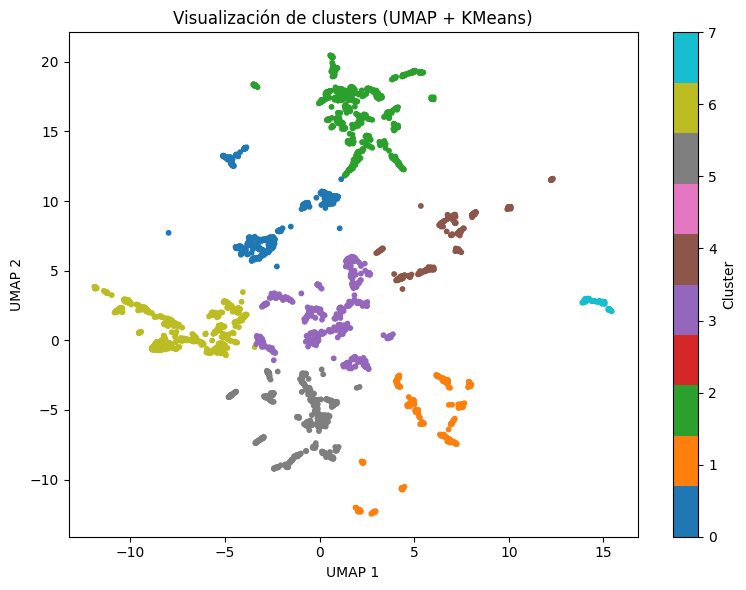

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_all[:, 0], X_umap_all[:, 1], c=clusters_all, cmap='tab10', s=10)
plt.title("Visualización de clusters (UMAP + KMeans)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


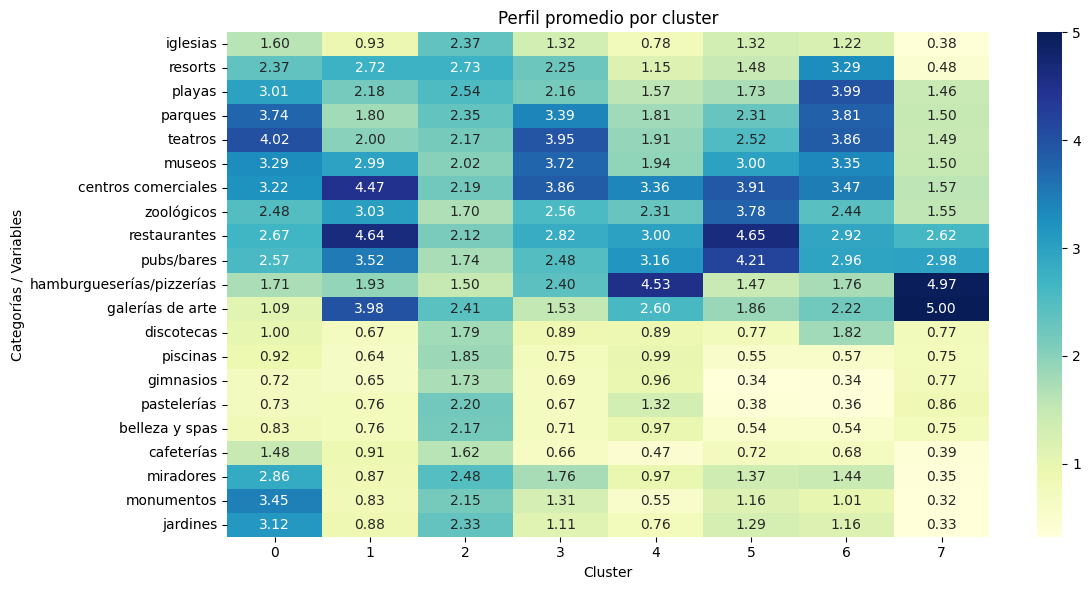

In [18]:
# Selecciona solo columnas numéricas excepto 'cluster'
cols_numericas = df_clusters.select_dtypes(include='number').columns.drop('cluster')
perfil_grupos = df_clusters.groupby('cluster')[cols_numericas].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(perfil_grupos.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Perfil promedio por cluster")
plt.xlabel("Cluster")
plt.ylabel("Categorías / Variables")
plt.tight_layout()
plt.show()

## 6. Clasificasión con RandomForest
Si bien se obtuvieron mejores resultados cuando no se utilizó RandomSearch, se generaron sospechas por obtener un resultado tan elevado (sobre 90% en casi todo), por lo que se decidió quitarlo.
Cabe mencionar que por falta de tiempo no se pudieron explorar más modelos, sin embargo los resultados obtenidos nos parecen suficientes para implementarlos como primera versión del chatbot de recomendaciones.

In [19]:
# Definir el modelo base
clf = RandomForestClassifier(random_state=42)

# Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced'],
}

# Randomized Search con validación cruzada
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search.fit(X_clf_train, y_clf_train)

# Evaluación
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_clf_test)

print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("\nReporte de clasificación con Random Forest optimizado:")
print(classification_report(y_clf_test, y_pred))



Mejores hiperparámetros encontrados:
{'class_weight': 'balanced', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 185}

Reporte de clasificación con Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       130
           1       0.76      0.84      0.80        89
           2       0.97      0.96      0.97       233
           3       0.86      0.92      0.89       208
           4       0.88      0.86      0.87        85
           5       0.90      0.87      0.88       172
           6       0.94      0.85      0.89       144
           7       0.97      0.93      0.95        30

    accuracy                           0.90      1091
   macro avg       0.90      0.89      0.90      1091
weighted avg       0.90      0.90      0.90      1091



In [20]:
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(best_reducer, "models/umap_reducer.pkl")
joblib.dump(best_kmeans, "models/kmeans_model.pkl")
joblib.dump(best_model, "models/rf_classifier.pkl")
joblib.dump(df_clusters.groupby("cluster").mean(), "models/perfil_grupos.pkl")

TypeError: agg function failed [how->mean,dtype->object]